### Dataset name KNN_Project_Data 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('data.csv', error_bad_lines=False).drop_duplicates()

## Show the first 20 rows of the dataset

In [20]:
data.head(20)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


## Show the description and the info on the dataset, using appropriate Pandas functions

In [21]:
data.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Use seaborn pairplot function to see which pairs of features form nice clusters

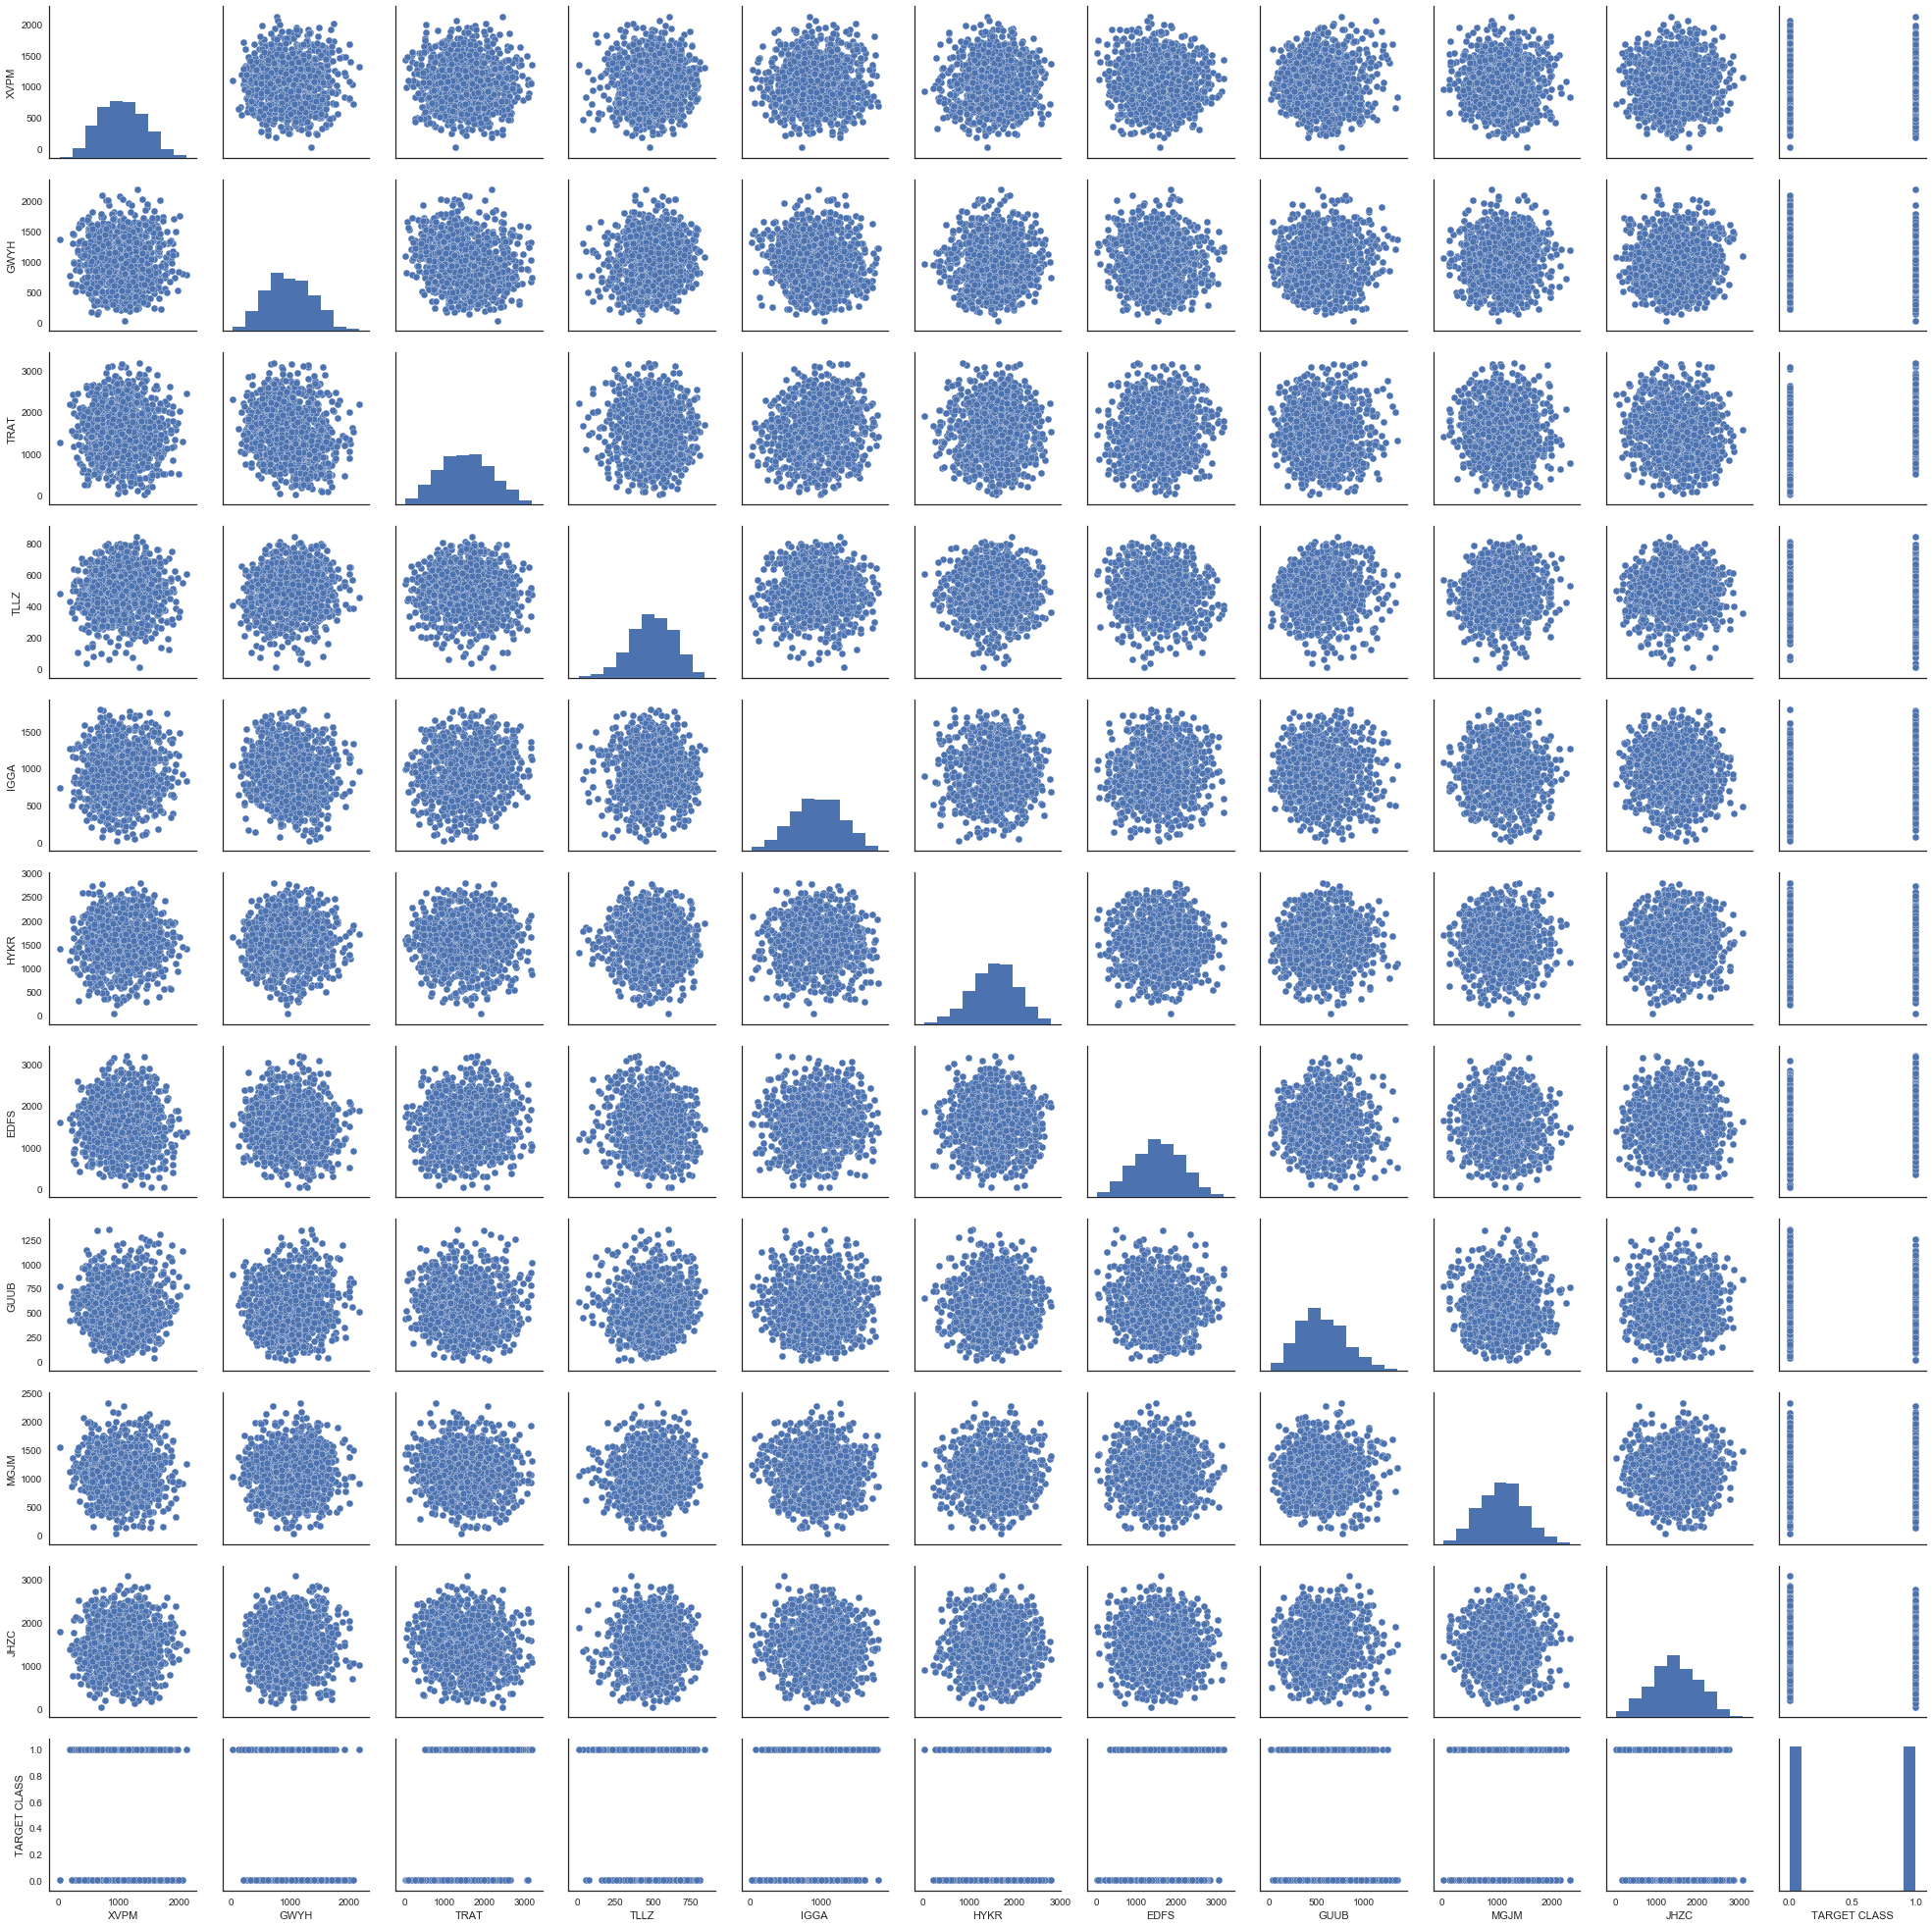

In [23]:
sns.pairplot(data)

## Split the data into training set and test set. Make a test set size 0.3 and random seed 123 (so the results are consistent for all students)

In [24]:
X, Y = data.drop(columns=['TARGET CLASS']), data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

## Standartize the variables - scale them to zero mean and unit variance. Do not pass the "TARGET CLASS" column to the scaler!

In [25]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Check that the features are indeed scaled

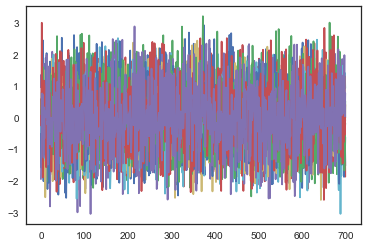

In [26]:
plt.plot(X_train)
plt.show()

### Fit the kNN to the training data. Use k = 1

(-3.499755151088786, 3.500244848911214)

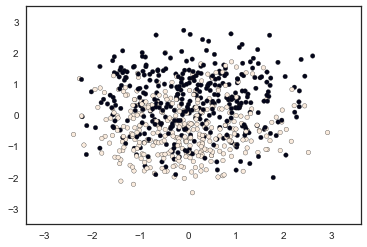

In [36]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

plt.figure()

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

### Check the classifier performance¶


In [38]:
pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))

[[103  40]
 [ 41 116]]


In [39]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.72      0.72      0.72       143
          1       0.74      0.74      0.74       157

avg / total       0.73      0.73      0.73       300



### Try different k values and select one that works best. The way to do it is to see when increasing k does not add to performance anymore.

(-3.499755151088786, 3.500244848911214)

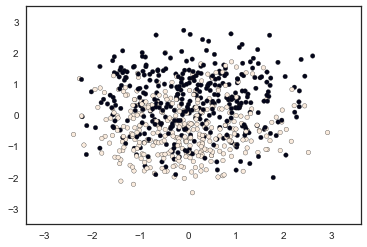

In [42]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3)
clf.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

plt.figure()

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-3.499755151088786, 3.500244848911214)

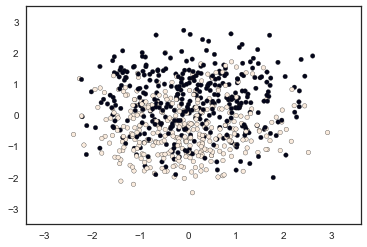

In [44]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(15)
clf.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))

plt.figure()

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())